 To study the Anatomy of a Wave file on a SingleAudioClip
 
 Run some visualization on the audio clip in variation to it's frequency/pitch/amplitude/energy.

# Libraries

In [ ]:
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd

from matplotlib import pyplot as plt
from IPython.display import Audio
from IPython.core.display import display
from librosa.core import istft

# Modules for Extraction and Visualization

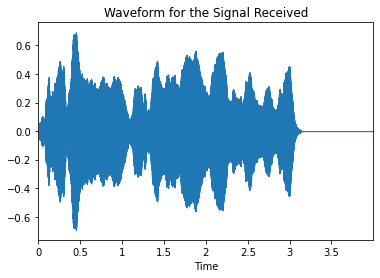

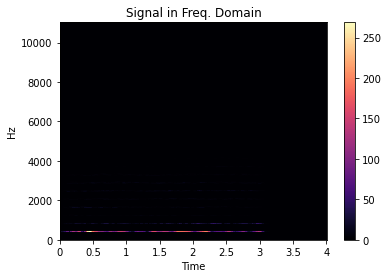

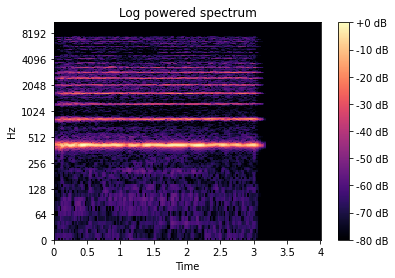

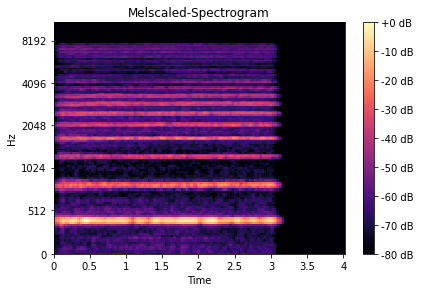

Shape for Spectrogram:  (128,)


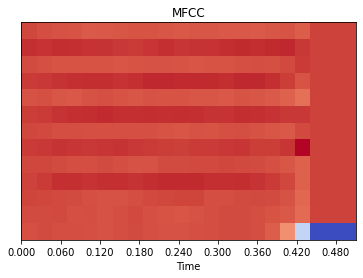

(13,)


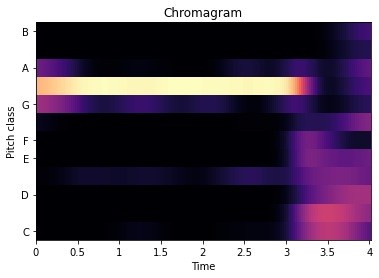

Chromagram Shape:  (12,)


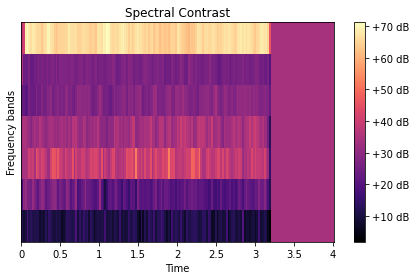

Contrast Shape:  (7,)


[1,
 array([1.3136026e-03, 1.5563930e-03, 2.3557905e-03, 2.7478030e-03,
        1.7244454e-03, 7.7577494e-04, 1.3660721e-03, 2.8978428e-03,
        8.1250846e-04, 7.4835197e-04, 7.7233184e-04, 8.7633298e-04,
        2.7019801e-03, 6.8216741e-02, 7.7394356e+01, 6.7156458e+02,
        1.3063071e+02, 1.2023000e-01, 5.8395588e-03, 5.0061005e-03,
        2.6078050e-03, 1.3324835e-03, 7.0741837e-04, 9.7062305e-04,
        1.1762256e-03, 5.1789207e-04, 2.3893008e-04, 2.2325157e-04,
        6.1453274e-04, 1.5689153e-02, 2.8945322e+00, 1.8431915e+01,
        5.0551100e+00, 1.5583612e-02, 5.7701912e-04, 1.8764591e-04,
        1.2316235e-04, 1.6229245e-04, 2.0230036e-04, 2.4987684e-04,
        1.5931646e-04, 1.0654242e-04, 1.1987995e-04, 1.8624410e-04,
        1.2168348e-03, 2.1338317e-01, 9.3684089e-01, 1.5883616e-01,
        1.5275079e-03, 2.3397256e-04, 3.0059493e-04, 4.6154903e-04,
        9.2072145e-04, 7.4413558e-04, 1.1540818e-03, 1.1472753e-02,
        2.6482689e+00, 7.9012065e+00, 2.5451

In [16]:
def beep():
    '''
    Function to hear the audio clip
    ''' 
    display(Audio('/Users/divyansh/Downloads/nsynth-train/audio/vocal_acoustic_000-068-100.wav', autoplay=True))
    
def features_extract(file):
    
    """
    Defining function that takes in a file and returns features in an array
    We have also incorporated some visual graphs for the AudioClip
    """
    
    #Getting a Wave Representation for the audio file
    #Specify your own directory prior running this code segment
    
    file='/Users/divyansh/Downloads/nsynth-train/audio/vocal_acoustic_000-068-100.wav'
    w, sr = librosa.load(file)
    plt.title('Waveform for the Signal Received') 
    librosa.display.waveplot(w,sr=sr)
    plt.show() 
    
    #Applying Discrete Fourier Transform over short overlapping windows to understand the characteristics better
    #The system assumes that the signal is stationary when it's windowed over short frames
    
    #We have gone with the default value for hop length here
    #Should be less than the frame size for frames to overlap
    hop_length=512
    
    #It's the number of samples per fft
    n_fft=2048
    D= np.abs(librosa.stft(w,n_fft=n_fft,hop_length=hop_length))
    librosa.display.specshow(D,sr=sr,x_axis='time',y_axis='hz')
    plt.title('Signal in Freq. Domain')
    plt.colorbar()
    plt.show()
    
    #Now because we couldn't see anything in the Freq-Domain Graph
    #Since humans hear within a specific freq-range
    #Converting both the axis, y to a log scale and x to decibel
    
    DB=librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB,sr=sr, hop_length=hop_length, x_axis='time',y_axis='log')
    plt.title('Log powered spectrum')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    
    #Starting off with the Features to be Extracted
    
    
    #Determine if the instrument is Harmonic or Percussive 
    
    w_harmonic, w_percussive = librosa.effects.hpss(w)
    if np.mean(w_harmonic)>np.mean(w_percussive):
        harmonic=1
    else:
        harmonic=0
    
    #Mel-Spectrogram

    spectrogram= librosa.feature.melspectrogram(w,sr=sr,hop_length=512, n_mels=128)
    
    #Log powered mel-spectrogram
    
    db_melscaled= librosa.power_to_db(spectrogram,ref=np.max)
    librosa.display.specshow(db_melscaled,sr=sr,hop_length=512,x_axis='time',y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.title('Melscaled-Spectrogram')
    plt.show()
    
    #We take average for each feature to fix MxN array into a table
    
    #Temporal Averaging
    spectrogram=np.mean(spectrogram,axis=1)
    print("Shape for Spectrogram: ",spectrogram.shape)

    
    #Mel-Frequency Cepstral Coefficients (MFCCs)
    dbmelscaled = istft(db_melscaled)
    mfcc = librosa.feature.mfcc(dbmelscaled, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfcc,x_axis='time')
    plt.title('MFCC')
    plt.show()
    
    #Temporal Averaging
    mfcc=np.mean(mfcc,axis=1)
    print(mfcc.shape)
    
    #Compute Chroma Energy
    chroma = librosa.feature.chroma_cens(w, sr=sr)
    librosa.display.specshow(chroma,x_axis='time',y_axis='chroma')
    plt.title('Chromagram')
    plt.show()
    
    
    #Temporally Average Chroma
    chroma = np.mean(chroma, axis = 1)
    print("Chromagram Shape: ",chroma.shape)
    
    #Compute Spectral Contrast
    contrast = librosa.feature.spectral_contrast(w, sr=sr)
    librosa.display.specshow(contrast,x_axis='time')
    plt.title('Spectral Contrast')
    plt.ylabel('Frequency bands')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()
    
    #Temporally Average Contrast
    contrast = np.mean(contrast, axis= 1)
    print("Contrast Shape: ",contrast.shape)
    
    #Passing the specific features we are gonna be putting into our train/test sets
    return [harmonic,spectrogram,mfcc,chroma,contrast]

file=['/Users/divyansh/Downloads/nsynth-train/audio/vocal_acoustic_000-068-100.wav']
beep()
features_extract(file)


In [2]:
%pwd
%cd /Users/divyansh/Downloads/nsynth-train/audio

/Users/divyansh/Downloads/nsynth-train/audio
